In [22]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd


def interact_plot(x, y, z, fig, ax, min, max, step, int):
    ax.scatter(x[0], y[0], z[0])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    slider=wd.IntSlider(
        value=0, #intial image index
        min=min,
        max=max, #video shouldn't play more than time limit
    )
    play_button=wd.Play(
        value=0, #intial image index
        min=min,
        max=max, #video shouldn't play more than time limit
        step=step,
        interval=int, #referesh interval in ms
        description="Press play",
    )

    wd.jslink((play_button,"value"),(slider,"value"))

    def slider_update(change):
        ax.scatter(x[change.new], y[change.new], z[change.new], color='C0')
        fig.canvas.draw_idle()
        plt.suptitle(f'Time: {slider.value}')
        
    slider.observe(slider_update, "value")

    out=wd.Output()
    app=wd.VBox([wd.HBox([play_button,slider]),out])
    display(app)



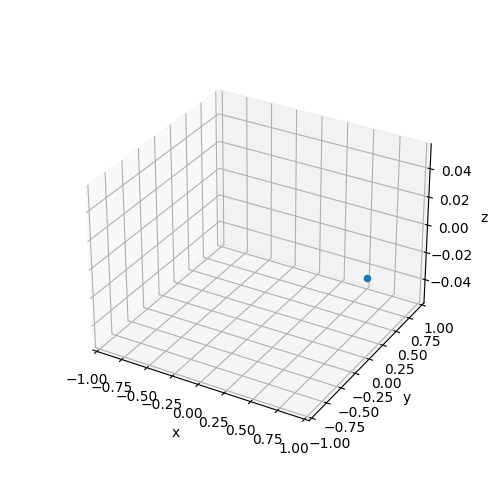

In [23]:

x, y, _, _ = np.loadtxt("2body1.txt", unpack=True)
z = np.zeros(len(x))
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

min = 0
max = 10000
step = 5
int = 1

interact_plot(x, y, z, fig, ax, min, max, step, int)